<a href="https://colab.research.google.com/github/adliif/Project-Rakamin/blob/main/ID_X_Partner_Final_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREDIT RISK (FINAL TASK ID/X PARTNERS)


---


Credit risk atau risiko kredit merujuk pada potensi kerugian keuangan yang dapat timbul akibat ketidakmampuan pihak peminjam untuk memenuhi kewajiban pembayaran mereka sesuai dengan perjanjian pinjaman. Risiko kredit adalah salah satu jenis risiko utama dalam sektor keuangan dan perbankan. Dimana institusi keuangan memberikan pinjaman atau kredit kepada individu, perusahaan, atau entitas lain.



> Outhor ADLI FIQRULLAH



## Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error

## Import Dataset

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/Career')

df=pd.read_csv('/content/Career/MyDrive/Career/IDX_2007_2014.csv')
df.head()

Drive already mounted at /content/Career; to attempt to forcibly remount, call drive.mount("/content/Career", force_remount=True).


<ipython-input-2-254d2c353e59>:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/Career/MyDrive/Career/IDX_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preparation

In [3]:
df.shape

(466285, 75)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
df.duplicated().sum()

0

<Axes: xlabel='count', ylabel='loan_status'>

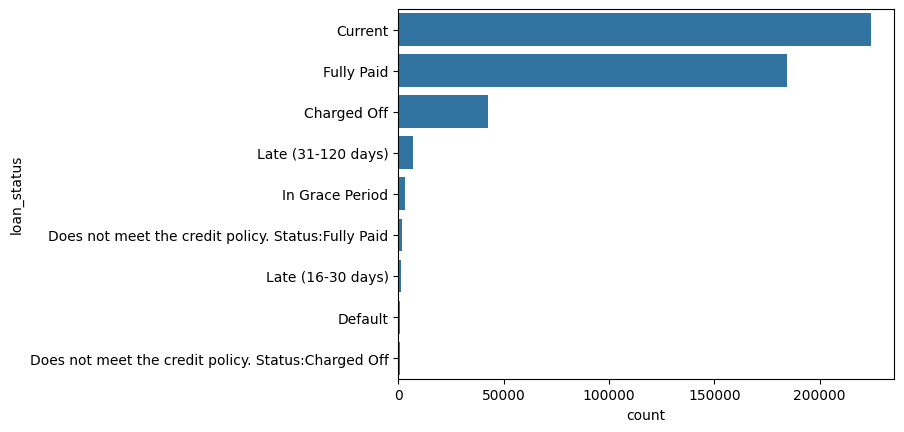

In [6]:
sns.countplot(y='loan_status', data=df, order=df['loan_status'].value_counts().index)

Jika dilihat dari visualisasi diatas, dapat menarik insight bahwasanya dari semua peminjam loan status mereka lebih dominan current dan fully paid. Dapat dikatakan bahwa sangat minim terjadinya credit risk pada perusahaan peminjam uang tersebut. Kemudian disini saya membuat feature baru yang diberi nama UserWarning, dimana feature ini yang memiliki karakteristik yang buruk sehingga tidak disarankan jika diberikan pinjaman lagi.

In [7]:
UserWarning = ['Charged Off',
               'Default',
               'Does not meet the credit policy. Status:Charged Off',
               'Late (31-120 days)']

df['UserWarning'] = np.where(df['loan_status'].isin(UserWarning), 1, 0)
df['UserWarning'].value_counts()

0    415317
1     50968
Name: UserWarning, dtype: int64

Ternyata yang termasuk peminjam yanng buruk lebih kecil daripada peminjam yang tidak bermasalah.

Selain itu, pada dataset ini memiliki beberapa feature yang tidak bisa digunakan untuk analysis karena berhubungan dengan identitas peminjam seperti Unnamed 0, id, member_id, etc. Pada dibawah ini saya akan menghapus feature yang berkaitan dengan identitas tersebut.

In [8]:
df.drop(['Unnamed: 0','id','member_id','application_type','verification_status','zip_code',
         'title','url','addr_state','emp_title','sub_grade','purpose','pymnt_plan','loan_status'], axis=1, inplace=True) # 'loan_status' dihapus disebabkan sudah tidak berguna lagi karena sudah dibuat feature UserWarning.

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,UserWarning
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Langkah selanjutnya melakukan pengecekan value missing sebanyak 30% sekaligus menghapus feature tersebut.

In [9]:
check_missing = df.isna()

missing_val = pd.DataFrame(check_missing.sum()/df.shape[0])
missing_val = missing_val[missing_val.iloc[:,0]>0.3]
missing_val

,0
desc,0.729815
mths_since_last_delinq,0.536906
mths_since_last_record,0.865666
next_pymnt_d,0.487286
mths_since_last_major_derog,0.787739
annual_inc_joint,1.000000
dti_joint,1.000000
verification_status_joint,1.000000
open_acc_6m,1.000000
open_il_6m,1.000000


In [10]:
missing_val = missing_val.index.tolist()
df.drop(missing_val,axis=1,inplace=True)

Setelah check missing value, langkah selanjutnya yaitu melakukan **Data Formatting** pada beberapa feature.

In [11]:
# Mengubah format 'term' yang awalnya 36 months menjadi 36 saja
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))
df['term'].head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int64

In [12]:
# Megubah format 'empt_length' dengan 10 jika +10 years dan 0 jika < 1 years
df['emp_length'] = df['emp_length'].replace(to_replace='10+ years',value=10)
df['emp_length'] = df['emp_length'].replace(to_replace='< 1 year',value=0)
df['emp_length'] = df['emp_length'].replace(to_replace='.years',value='',regex=True)
df['emp_length'] = df['emp_length'].replace(to_replace='.year',value='',regex=True)
df['emp_length'].astype('float').head()

0    10.0
1     0.0
2    10.0
3    10.0
4     1.0
Name: emp_length, dtype: float64

In [13]:
# Mengubah format 'earliest_cr_line' menjadi berapa lama waktu berlalu dihitung dari hari ini. Disini patokannya pada tanggal 2017-12-01
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['earliest_cr_line']) / np.timedelta64(1, 'M')))

df['earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: earliest_cr_line, dtype: float64

Terdapat keanehan pada feature **'earliest_cr_line'** sebab ditemukan minus. Mungkin karena ada beberapa data tahun-90 an yang terdeteksi diatas tahun 2017. Seperti yang seharusnya tahun 1924 menjadi 2024. Maka untuk mengatasi permasalahan tersebut diperlukan fungsi max().

In [14]:
df.loc[df['earliest_cr_line']<0, 'earliest_cr_line'] = df['earliest_cr_line'].max()
df['earliest_cr_line'].describe()

count    466256.000000
mean        242.385374
std          86.460310
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         587.000000
Name: earliest_cr_line, dtype: float64

Setelah tidak ditemukan minus, langkah selanjutnya yaitu lakukan hal yang sama pada feature **'issue_d', 'last_pymnt_d', dan 'last_credit_pull_d'**. Jika ditemukan keanehan seperti minus maka feature tersebut dibarengi dengan fungsi max().

In [15]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['issue_d']) / np.timedelta64(1, 'M')))

df['issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: issue_d, dtype: float64

In [16]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_pymnt_d']) / np.timedelta64(1, 'M')))

df['last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: last_pymnt_d, dtype: float64

In [17]:
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_credit_pull_d']) / np.timedelta64(1, 'M')))

df['last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: last_credit_pull_d, dtype: float64

## EDA (Exploratory Data Analysis)

<ipython-input-18-9d54b8cc57c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

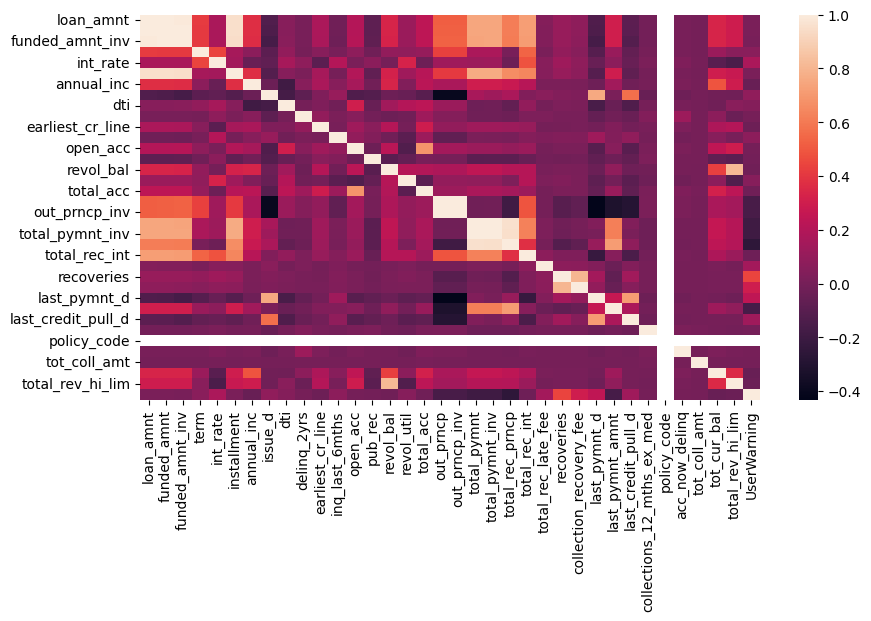

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())

Tujuan dari visualisasi heatmap diatas yaitu untuk mencari hubungan corelasi antar data. Kemudian terdapat 1 feature yang tidak memiliki corelasi sama sekali dengan feature lainnya yaitu **'policy_code'**. Maka feature tersebut bisa di drop diikuti dengan feature yang memiliki hubungan corelasi < 0.7 sebagai patokan saja.

In [19]:
corr = df.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
corr_feature = [column for column in upper.columns if any(upper[column] > 0.7)]

corr_feature

<ipython-input-19-ebe2181f6ac8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().abs()


['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'total_rev_hi_lim']

In [20]:
df.drop(corr_feature, axis=1, inplace=True)
df.drop(['policy_code'], axis=1, inplace=True)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'issue_d', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'UserWarning'],
      dtype='object')

Kemudian periksa kembali **Missing Value**. Jika > 70% maka feature akan di drop dan < 70% data akan diisi dengan nilai 0 (Bisa diganti menggunakan median, mean, ataupun modus).

In [21]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

tot_coll_amt                  15.071469
tot_cur_bal                   15.071469
emp_length                     4.505399
revol_util                     0.072917
collections_12_mths_ex_med     0.031097
delinq_2yrs                    0.006219
earliest_cr_line               0.006219
inq_last_6mths                 0.006219
open_acc                       0.006219
pub_rec                        0.006219
total_acc                      0.006219
acc_now_delinq                 0.006219
annual_inc                     0.000858
dtype: float64

In [22]:
df.fillna(0, inplace=True)

Langkah selanjutnya yaitu melakukan One-hot encoding pada data categorical dan standarisasi pada data numerical

In [23]:
# One-Hot Encoding
categorical_cols = [col for col in df.select_dtypes(include='object').columns.tolist()]
categorical_cols = pd.get_dummies(df[categorical_cols], drop_first=True)

# Standarisasi
numerical_cols = [col for col in df.select_dtypes(exclude='object').columns.tolist() if col != 'UserWarning'] # Feature UserWarning dikecualikan sebab feature tersebut akan dijadikan target dari model yang digunakan.

ss = StandardScaler()
numerical_cols = pd.DataFrame(ss.fit_transform(df[numerical_cols]), columns=numerical_cols)

Kemudian data yang sudah di one-hot encoding dan standarisasi digabungkan kembali dengan menggunakan perintah concat() diikuti dengan feature 'UserWarning'.

In [24]:
df = pd.concat([categorical_cols, numerical_cols, df[['UserWarning']]], axis=1)
df.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10,emp_length_1,emp_length_2,emp_length_3,...,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,UserWarning
0,1,0,0,0,0,0,1,0,0,0,...,1.159498,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,0
1,0,1,0,0,0,0,0,0,0,0,...,-1.965980,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,1
2,0,1,0,0,0,0,1,0,0,0,...,1.782070,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,0
3,0,1,0,0,0,0,1,0,0,0,...,-1.478018,1.028934,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,0
4,1,0,0,0,0,0,0,1,0,0,...,-0.094058,1.115130,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,0


In [25]:
X = df.drop('UserWarning', axis=1)  # Feature
y = df['UserWarning']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape, X_test.shape

((373028, 43), (93257, 43))

## Modelling

Model pertama, Saya akan menggunakan model klasifikasi RandomForest

In [27]:
model = RandomForestClassifier(max_depth=4)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [28]:
# Melakukan prediksi pada data test
y_pred = model.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
df_actual_predicted.index = y_test.index

Model kedua, Saya akan menggunakan model regresi linear

In [29]:
le = LinearRegression()
le.fit(X_train, y_train)

LinearRegression()

In [30]:
# Melakukan prediksi pada data test
y_pred = le.predict(X_test)

# Menghitung residual
residuals = y_test - y_pred

# Menghitung nilai mse
mse = mean_squared_error(y_test, y_pred)

## Evaluation

Evaluasi dari model klasifikasi RandomForest

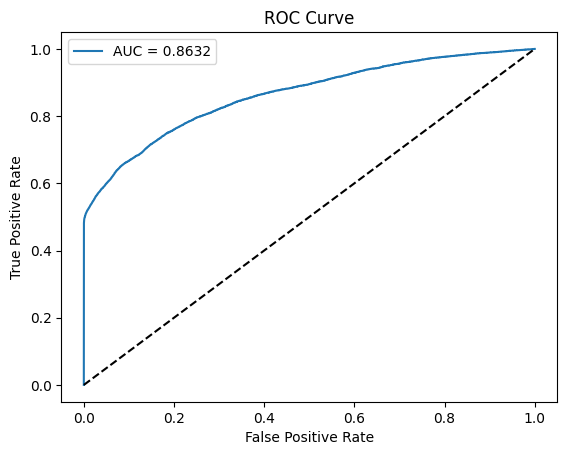

In [31]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

Model yang dibangun menghasilkan performa AUC = 0.857. Pada credit risk modeling, AUC di atas 0.7 sudah dapat dikatakan memiliki performa yang bagus.

Evaluasi dari model regresi linear

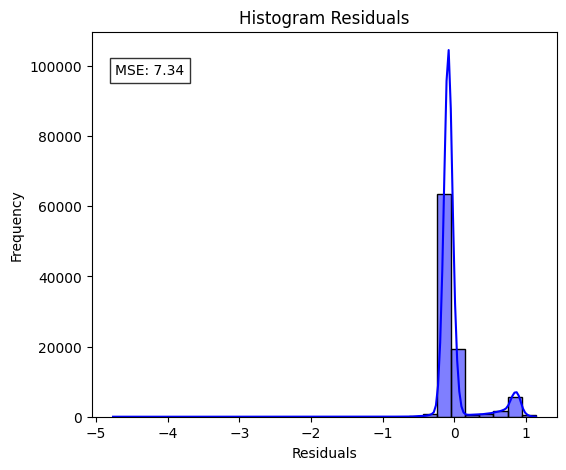

In [32]:
# Membuat histogram residual
plt.figure(figsize=(6, 5))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title('Histogram Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.text(0.05, 0.9, f'MSE: {mse*100:.2f}', ha='left', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

Sebagian besar residual berpusat di sekitar nol pada histogram. Ini menunjukkan bahwa model secara keseluruhan baik dalam memprediksi nilai target. Selain itu, ini juga menunjukkan bahwa model tidak cenderung sistematis meremehkan atau memperbesar prediksinya. Kemudian Model yang dibangun menghasilkan nilai mse yang kecil. Semakin kecil nilai mse maka semakin bagus pula model regresi yang digunakan.